
# Databases with Python Pandas

## **Diego Tuccillo**




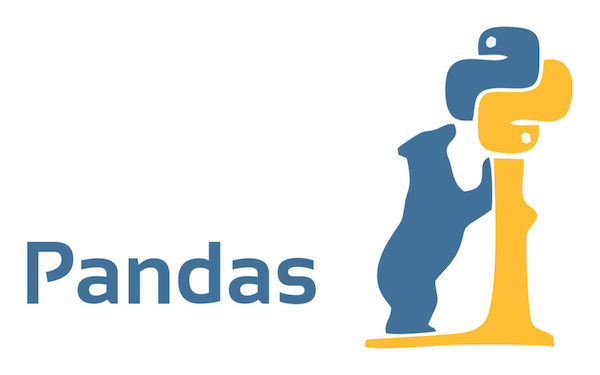



https://pandas.pydata.org



Pandas is a library for generating, manipulating and retriving data from a relational database. One of the reasons for the popularity of relational databases is that properly designed relational databases can handle huge amounts of data. 
With this library you can look at large datasets or you can zoom in on individual rows.

But what is a database? is nothing more than a set of related information. A telephone book for example is a databases. 
Because finding information in a large database is time consuming, one of the first computer applications developed were *database systems* which are computerized data storage and retrival mechanisms. 

### Non relational Databases

Over the first decades of computerized systems data were stored in various ways.
In a **hierarchical database system** the data is rapresented in one or more tree structures. Hierarchical database system provide tool to locate a particular tree and traversing the information inside it.


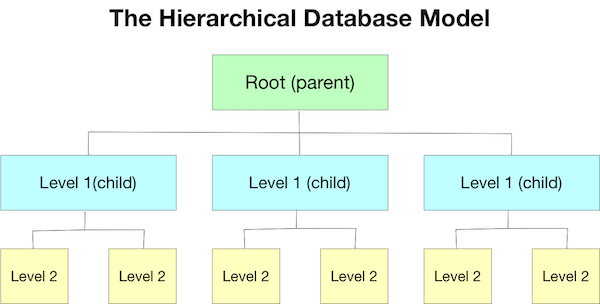

Another common approach called **network database system** exposes sets of records and sets of links that define relationships between different records. 

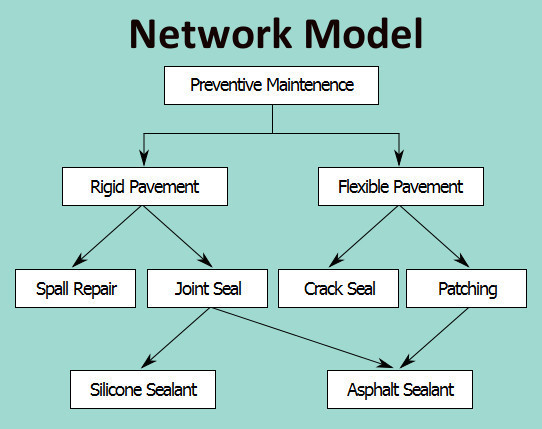


Both systems are alive, but starting from 1970 a new way to represent data began to take root.





### Relational databases

Data representd as sets of tables. Rather than using pointers to navigate between related entities, redundant data is used to link records in different tables. 

Each table in a relational database includes information that uniquely identifies a row in that table (known as primary key), along with additional information needed to describe the entity completely.



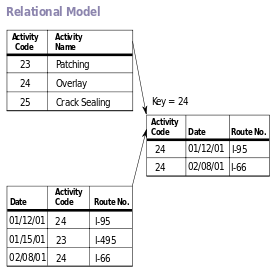



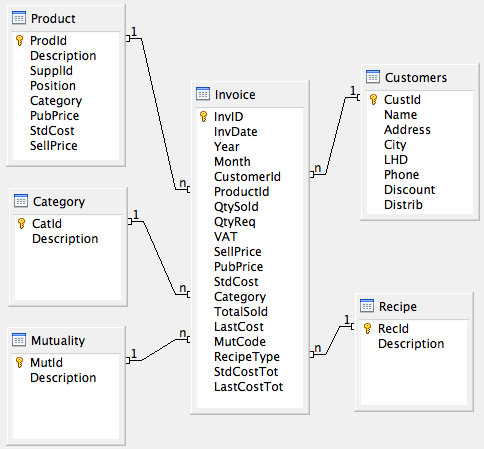




## Pandas


Contains high-level data structures and manipulation tools designed to make data analysis fast and easy in Python. pandas is built on top of NumPy and makes it easy to use in NumPy-centric applications.
Started building pandas in 2008.

The author of Pandas says:

At the time, I had a distinct set of requirements that were not well-addressed by any single tool at my disposal:

• Data structures with labeled axes supporting automatic or explicit data alignment. This prevents common errors resulting from misaligned data and working with differently-indexed data coming from different sources.

• Integrated time series functionality.

• The same data structures handle both time series data and non-time series data.

• Arithmetic operations and reductions (like summing across an axis) would pass on the metadata (axis labels).

• Flexible handling of missing data.

• Merge and other relational operations found in popular database databases (SQL- based, for example).

--- 



## PART 1: introduction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#The data frame as a way to store data in rectangular grids that can easily be overviewed.
#Each row of these grids corresponds to measurements or values of an instance,
#while each column is a vector containing data for a specific variable

a = np.arange(12)+8
b = np.random.randn(12)
c = np.linspace(18.0, 25.0, num=12)  
    
df = pd.DataFrame({ 'Numeros Enteros' : a,'Numeros continuos' : b,'otra cosa' : c}) 

df 


,Numeros Enteros,Numeros continuos,otra cosa
0,8,0.630842,18.000000
1,9,0.735939,18.636364
2,10,-1.087130,19.272727
3,11,0.038503,19.909091
4,12,0.294673,20.545455
5,13,0.364212,21.181818
6,14,2.803459,21.818182
7,15,-0.876174,22.454545
8,16,0.948294,23.090909
9,17,-0.368288,23.727273


In [7]:
#Now you can explore your dataframe.
df.head(0)

,A,B,C


In [68]:
print(df.head(3))

    A         B          C
0   8 -1.070601  18.000000
1   9 -0.460806  18.636364
2  10  0.527387  19.272727


Question 1 : so what is doing with head?

In [6]:
# and indexes
df.index

RangeIndex(start=0, stop=12, step=1)

In [69]:
# a summary of all variables:
df.describe()

,A,B,C
count,12.000000,12.000000,12.000000
mean,13.500000,-0.075101,21.500000
std,3.605551,1.272347,2.294442
min,8.000000,-1.544192,18.000000
25%,10.750000,-0.902088,19.750000
50%,13.500000,-0.218738,21.500000
75%,16.250000,0.508423,23.250000
max,19.000000,2.997040,25.000000


In [71]:
# I can calculate the frequence of a value:
a[0:3] = 3
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c}) 

print(df)

df['A'].value_counts()

     A         B          C
0    3 -1.070601  18.000000
1    3 -0.460806  18.636364
2    3  0.527387  19.272727
3   11  0.502102  19.909091
4   12  0.023330  20.545455
5   13 -0.845917  21.181818
6   14 -0.793566  21.818182
7   15 -1.544192  22.454545
8   16  0.223309  23.090909
9   17  2.997040  23.727273
10  18  1.019047  24.363636
11  19 -1.478339  25.000000


3     3
15    1
14    1
13    1
12    1
11    1
19    1
18    1
17    1
16    1
Name: A, dtype: int64

In [73]:
#it counts also non-numerical values:
a = a.astype(str)
a[3:9] = 'test'
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c}) 
print(df)

df['A'].value_counts()

       A         B          C
0      3 -1.070601  18.000000
1      3 -0.460806  18.636364
2      3  0.527387  19.272727
3   test  0.502102  19.909091
4   test  0.023330  20.545455
5   test -0.845917  21.181818
6   test -0.793566  21.818182
7   test -1.544192  22.454545
8   test  0.223309  23.090909
9     17  2.997040  23.727273
10    18  1.019047  24.363636
11    19 -1.478339  25.000000


test    6
3       3
18      1
19      1
17      1
Name: A, dtype: int64

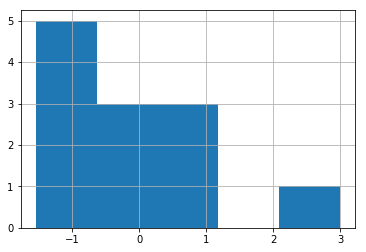

In [74]:
# I can quickly do an histogram

df['B'].hist(bins=5)

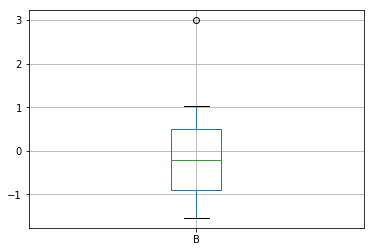

In [78]:
#or the boxplots:
df.boxplot(column='B')


Practice : try the boxplot of the whole dataframe. Do you have a missing column? why?

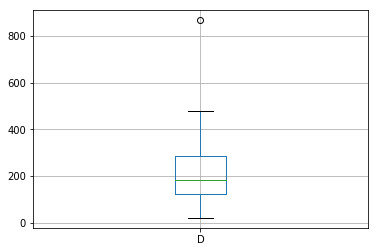

In [79]:
# As we said, boxplots are useful to detect outliers:

friendsOnFB = [20, 63, 140, 165, 178, 63, 191, 364, 260, 234, 867, 480]
d = friendsOnFB
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})

df.boxplot(column='D')

Note: visualize the dataframe after you modify it

         A         B          C    D
0   chicos -1.070601  18.000000   20
1   chicos -0.460806  18.636364   63
2   chicos  0.527387  19.272727  140
3   chicos  0.502102  19.909091  165
4   chicos  0.023330  20.545455  178
5   chicos -0.845917  21.181818   63
6   chicos -0.793566  21.818182  191
7   chicas -1.544192  22.454545  364
8   chicas  0.223309  23.090909  260
9   chicas  2.997040  23.727273  234
10  chicas  1.019047  24.363636  867
11  chicas -1.478339  25.000000  480


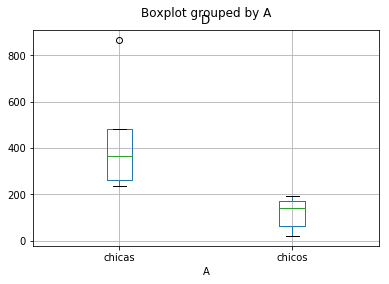

In [80]:
#and you can quickly look at trends:
a
a[0:7] = 'chicos'
a[7:12]= 'chicas'

df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})


print(df)

df.boxplot(column='D', by = 'A')

In [81]:
# A huge problem in data analysis are the missing values
b = b.astype(float)
b[5] = np.nan

df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})

df

,A,B,C,D
0,chicos,-1.070601,18.000000,20
1,chicos,-0.460806,18.636364,63
2,chicos,0.527387,19.272727,140
3,chicos,0.502102,19.909091,165
4,chicos,0.023330,20.545455,178
5,chicos,NaN,21.181818,63
6,chicos,-0.793566,21.818182,191
7,chicas,-1.544192,22.454545,364
8,chicas,0.223309,23.090909,260
9,chicas,2.997040,23.727273,234


In [82]:
#with pandas you have various routines to deal with them. You can COUNT them:

df.apply(lambda x: sum(x.isnull()),axis=0) 

A    0
B    1
C    0
D    0
dtype: int64

In [83]:
# and you can fill the missing value with another inferred value, for example:
df['B'].fillna(df['B'].mean(), inplace=True)

In [12]:
df

,A,B,C,D
0,chicos,1.408441,18.000000,20
1,chicos,-0.367526,18.636364,63
2,chicos,1.795937,19.272727,140
3,chicos,-0.193218,19.909091,165
4,chicos,-0.040401,20.545455,178
5,chicos,-0.028826,21.181818,63
6,chicos,-0.681536,21.818182,191
7,chicas,-0.775187,22.454545,364
8,chicas,-0.465614,23.090909,260
9,chicas,-0.158536,23.727273,234


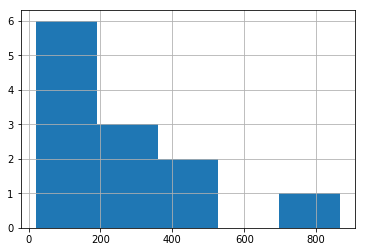

In [84]:
# If I have a problem rappresenting a data-point
df['D'].hist(bins=5)

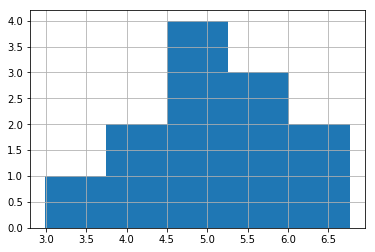

In [85]:
#I can quickly change the scale
df['D'] = np.log(df['D'])
df['D'].hist(bins=5)

In [86]:
# More Options. Given:
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})
df

,A,B,C,D
0,chicos,-1.070601,18.000000,20
1,chicos,-0.460806,18.636364,63
2,chicos,0.527387,19.272727,140
3,chicos,0.502102,19.909091,165
4,chicos,0.023330,20.545455,178
5,chicos,NaN,21.181818,63
6,chicos,-0.793566,21.818182,191
7,chicas,-1.544192,22.454545,364
8,chicas,0.223309,23.090909,260
9,chicas,2.997040,23.727273,234


In [87]:
# yuou can calculate Trnsposte :
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
A,chicos,chicos,chicos,chicos,chicos,chicos,chicos,chicas,chicas,chicas,chicas,chicas
B,-1.0706,-0.460806,0.527387,0.502102,0.0233301,NaN,-0.793566,-1.54419,0.223309,2.99704,1.01905,-1.47834
C,18,18.6364,19.2727,19.9091,20.5455,21.1818,21.8182,22.4545,23.0909,23.7273,24.3636,25
D,20,63,140,165,178,63,191,364,260,234,867,480


In [88]:
# sorting:
df.sort_values(by='D')

,A,B,C,D
0,chicos,-1.070601,18.000000,20
1,chicos,-0.460806,18.636364,63
5,chicos,NaN,21.181818,63
2,chicos,0.527387,19.272727,140
3,chicos,0.502102,19.909091,165
4,chicos,0.023330,20.545455,178
6,chicos,-0.793566,21.818182,191
9,chicas,2.997040,23.727273,234
8,chicas,0.223309,23.090909,260
7,chicas,-1.544192,22.454545,364


In [16]:
#select specific column:
df['A']

0     chicos
1     chicos
2     chicos
3     chicos
4     chicos
5     chicos
6     chicos
7     chicas
8     chicas
9     chicas
10    chicas
11    chicas
Name: A, dtype: object

In [17]:
#slice 
df[0:3]

,A,B,C,D
0,chicos,1.408441,18.000000,20
1,chicos,-0.367526,18.636364,63
2,chicos,1.795937,19.272727,140


In [18]:
# more columns
df.loc[:,['A','B']]

,A,B
0,chicos,1.408441
1,chicos,-0.367526
2,chicos,1.795937
3,chicos,-0.193218
4,chicos,-0.040401
5,chicos,-0.028826
6,chicos,-0.681536
7,chicas,-0.775187
8,chicas,-0.465614
9,chicas,-0.158536


In [19]:
#specific location (index)
df.iloc[3]

A      chicos
B   -0.193218
C     19.9091
D         165
Name: 3, dtype: object

In [20]:
#in generale slices specific
df.iloc[1:3,:]

,A,B,C,D
1,chicos,-0.367526,18.636364,63
2,chicos,1.795937,19.272727,140


In [21]:
# QUERIES:
df
df[df.D > 70]

,A,B,C,D
2,chicos,1.795937,19.272727,140
3,chicos,-0.193218,19.909091,165
4,chicos,-0.040401,20.545455,178
6,chicos,-0.681536,21.818182,191
7,chicas,-0.775187,22.454545,364
8,chicas,-0.465614,23.090909,260
9,chicas,-0.158536,23.727273,234
10,chicas,-0.019055,24.363636,867
11,chicas,0.282608,25.000000,480


In [90]:
#multiple:
df[(df.D > 70) & (df.C > 23)]

,A,B,C,D
8,chicas,0.223309,23.090909,260
9,chicas,2.997040,23.727273,234
10,chicas,1.019047,24.363636,867
11,chicas,-1.478339,25.000000,480


---

---

# Exercise number 1

1) read the csv : Centroides_NucleosPoblacion.csv

2) Explora los datos: cuantas entradas hay?

3) promedio y mediana de la populacion

4) histogramas y box-plots de las columnas



queries:
    
5) busca cual es el  municipio mas poblado, y el menos pobloado

6) busca el municipios con menos de 11000 habitantes

- Quinto municipio mas poblado

- 10 municipios de menor poblacion


FOR THE BRAVER:
Puedes hacer una "rough" map de españa con estos datos y colorar de color diferente las 10 porovincias con mas poblacion y las 10 con menos? 


---


In [165]:
# to start the exercise 1

df_municipios = pd.read_csv( "Exercise1_pandas/Centroides_NucleosPoblacion.csv" )

df_municipios.index

df_municipios.describe()

#df_municipios.boxplot(column = 'Poblacion')

df_municipios.head()


def namePoblacion(num):
    new = df_municipios.sort_values('Poblacion', axis=num, ascending=False).iloc[0]
    return new.loc['Municipio']


#more numerous
print (namePoblacion(0))





Madrid
